# Práctica 3
## Ejercicio 2

### Modelo sin intercepto
Se ajusta un modelo de la forma: $f(x|\beta) = \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

Obs: En este caso se elige $\phi_1(x) =x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.

**Ejercicio**: realizar el ajuste correspondiente para este caso con polyfit de numpy y con QR.

---

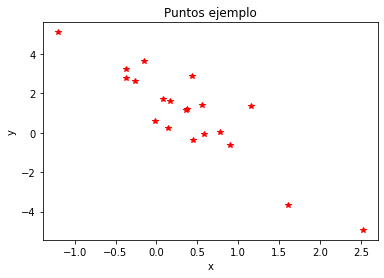

In [34]:
import numpy as np
import matplotlib.pyplot as plt 
from pprint import pprint
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

In [23]:
ngrado = 1
coeficientes = np.polyfit(x,y,ngrado)
pprint.pprint(coeficientes)

array([-2.65,  2.03])


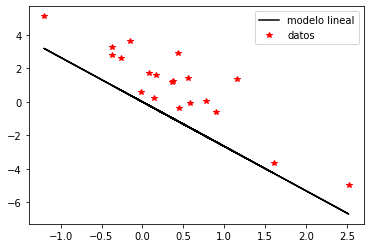

In [28]:
y_ajustadas_numpy = coeficientes[0] * x 
plt.plot(x, y_ajustadas_numpy, 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

### Polyfit no funciona bien porque siempre nos va a regresar un polinomio de n grado. Habrá que hacerlo con factorización QR
---
## Factorización QR

In [73]:
#construir matriz A
A=np.ones((mpoints,1))
A[:,0] = x
pprint(A)

array([[-0.26],
       [ 0.09],
       [ 0.43],
       [ 0.9 ],
       [ 0.56],
       [ 0.44],
       [ 0.38],
       [-0.15],
       [ 0.78],
       [-0.02],
       [ 1.61],
       [-0.37],
       [ 0.36],
       [ 0.17],
       [ 2.52],
       [ 0.14],
       [ 1.16],
       [ 0.59],
       [-1.2 ],
       [-0.37]])


In [67]:
Q,R = np.linalg.qr(A)

In [68]:
#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)
pprint(beta)

array([-1.6])


In [71]:
y_ajustadas_QR = A@beta
pprint(y_ajustadas_QR)

array([ 0.42, -0.14, -0.69, -1.43, -0.89, -0.7 , -0.6 ,  0.24, -1.24,
        0.04, -2.57,  0.59, -0.57, -0.27, -4.02, -0.22, -1.85, -0.94,
        1.92,  0.59])


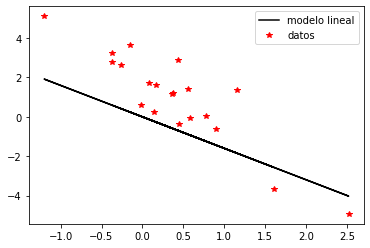

In [70]:

plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')